## Tarea 5.7

En ausencia de una señal, un cierto detector de partículas en promedio detecta  2  impactos por segundo debidos a una contaminación de fondo. Durante una medición se obtienen las siguientes observaciones (esta es una lista del número de señales por cada segundo de duración del experimento):

In [1]:
mediciones = [2, 3, 3, 3, 0, 1, 2, 2, 0, 4, 10, 0, 2, 4, 6, 3, 2, 1, 1, 1]

Compare estos resultados con la distribución de Poisson. Discuta en cuáles intervalos cree usted que se detectó una señal que no es contaminación.

## Solución.

Usando la distribución de Poisson, que se define como:


$$
P(n; \lambda) = \frac{\lambda^n}{n!} e^{-\lambda}
$$

Podemos definir nuestra función de la siguiente manera:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math



def resultados_poisson(eventos, lamda): # Definimos nuestra función.
    '''
    Esta función calcula la distribución de Poisson para cualquier valor 
    de "eventos".
    
    Veremos más adelante que nos servirá para poder calcular la distribución
    de Poisson de los valores de la lista "mediciones".
    
    Los inputs son:
    
    eventos = el número de mediciones.
    lamda = el promedio de las mediciones.
    
    '''
    poisson = [] # Se define una lista para los valores
                 # de la distribución de Poisson.
  
    if eventos == int: # Ponemos la condición de que si eventos es un entero,
                       # regresamos la distribución de Poisson.
        
        return (lamda**eventos)*np.exp(-lamda)/(math.factorial(eventos))
    else: 
        # Por otro lado, iniciamos un ciclo en donde agregamos
        # los términos de la distribución de Poisson a la lista "poisson".
        for i in eventos:
            poisson.append((lamda**i)*np.exp(-lamda)/(math.factorial(i)))
        return poisson   
        

Ejecutando el código

In [14]:
resultados_poisson(mediciones, 2)

[0.2706705664732254,
 0.1804470443154836,
 0.1804470443154836,
 0.1804470443154836,
 0.1353352832366127,
 0.2706705664732254,
 0.2706705664732254,
 0.2706705664732254,
 0.1353352832366127,
 0.0902235221577418,
 3.8189850648779595e-05,
 0.1353352832366127,
 0.2706705664732254,
 0.0902235221577418,
 0.012029802954365574,
 0.1804470443154836,
 0.2706705664732254,
 0.2706705664732254,
 0.2706705664732254,
 0.2706705664732254]

Text(0.5, 0.98, 'Comparación entre gráficos')

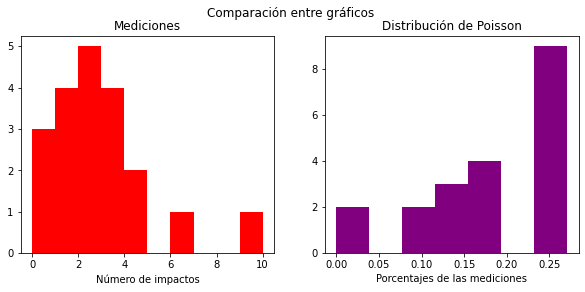

In [4]:
fig,ax = plt.subplots(1,2, figsize=(10,4))

ax[0].hist(mediciones, bins=10, color="Red")
ax[0].set_title("Mediciones")
ax[0].set_xlabel("Número de impactos")
ax[1].hist(resultados_poisson(mediciones, 2), bins = 7, color="Purple")
ax[1].set_title("Distribución de Poisson")
ax[1].set_xlabel("Porcentajes de las mediciones")
fig.suptitle("Comparación entre gráficos")

# Acá hacemos unos gráficos para las mediciones
# y para la distribución de poisson
# Esto es simplemente para comparar una de otra.

Vemos que el número 10 es un numero que dista mucho de los valores de la lista, por lo cual creeemos que es la señal que no detecto 
contaminación.